In [1]:
#COVID 19 Peru - Arequipa
#Alexander Pinto
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt
import datetime

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use('seaborn-whitegrid')
%matplotlib inline
file = "covid-19-peru-data"

In [2]:
def LeerDatos(filename : str, header = True):
    if (header):
        data = pd.read_csv(filename + ".csv", sep =',', header = 0)
    else:
        data = pd.read_csv(filename+ ".csv", sep =',', header = None)
    #data = data.sample(frac = 1)
    #data = data.sort_values(data.columns[-1])
    #return np.array(data.iloc[:,:])
    #return data.to_numpy()
    return data

In [3]:
data = LeerDatos(file)
data

,country,iso3c,region,date,confirmed,deaths,recovered,negative_cases,pcr_positivo,prueba_rapida_positivo,pcr_prapida_positivo
0,Peru,PER,NaN,2020-03-06,1,NaN,NaN,154.0,NaN,NaN,NaN
1,Peru,PER,NaN,2020-03-07,6,NaN,NaN,213.0,NaN,NaN,NaN
2,Peru,PER,NaN,2020-03-09,9,NaN,NaN,309.0,NaN,NaN,NaN
3,Peru,PER,NaN,2020-03-10,11,NaN,NaN,335.0,NaN,NaN,NaN
4,Peru,PER,NaN,2020-03-11,17,NaN,NaN,697.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1496,Peru,PER,San Martín,2020-05-18,652,12.0,NaN,NaN,195.0,457.0,NaN
1497,Peru,PER,Tacna,2020-05-18,216,2.0,NaN,NaN,26.0,190.0,NaN
1498,Peru,PER,Tumbes,2020-05-18,639,59.0,NaN,NaN,75.0,564.0,NaN
1499,Peru,PER,Ucayali,2020-05-18,2032,91.0,NaN,NaN,417.0,1615.0,NaN


In [4]:
values = {'region' : 'Peru' }
data.fillna(value = values, inplace = True)

In [5]:
regiones = data.groupby(['region'])
#regiones.groups

In [6]:
aqp_d = regiones.get_group('Arequipa')
peru_d = regiones.get_group('Peru')

In [7]:
peru_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 1500
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 73 non-null     object 
 1   iso3c                   73 non-null     object 
 2   region                  73 non-null     object 
 3   date                    73 non-null     object 
 4   confirmed               73 non-null     int64  
 5   deaths                  61 non-null     float64
 6   recovered               64 non-null     float64
 7   negative_cases          73 non-null     float64
 8   pcr_positivo            39 non-null     float64
 9   prueba_rapida_positivo  39 non-null     float64
 10  pcr_prapida_positivo    2 non-null      float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.8+ KB


In [8]:
aqp_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 6 to 1478
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 67 non-null     object 
 1   iso3c                   67 non-null     object 
 2   region                  67 non-null     object 
 3   date                    67 non-null     object 
 4   confirmed               67 non-null     int64  
 5   deaths                  45 non-null     float64
 6   recovered               0 non-null      float64
 7   negative_cases          0 non-null      float64
 8   pcr_positivo            39 non-null     float64
 9   prueba_rapida_positivo  39 non-null     float64
 10  pcr_prapida_positivo    2 non-null      float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.3+ KB


In [9]:
aqp_d.describe()

,confirmed,deaths,recovered,negative_cases,pcr_positivo,prueba_rapida_positivo,pcr_prapida_positivo
count,67.000000,45.000000,0.0,0.0,39.000000,39.000000,2.0
mean,385.194030,10.955556,NaN,NaN,197.692308,432.025641,1.0
std,506.646887,7.064494,NaN,NaN,96.087174,445.675920,0.0
min,2.000000,1.000000,NaN,NaN,69.000000,8.000000,1.0
25%,18.000000,5.000000,NaN,NaN,107.000000,33.000000,1.0
50%,99.000000,10.000000,NaN,NaN,193.000000,323.000000,1.0
75%,639.500000,20.000000,NaN,NaN,269.500000,615.000000,1.0
max,1929.000000,23.000000,NaN,NaN,372.000000,1557.000000,1.0


In [10]:
#%matplotlib inline
#import matplotlib.pyplot as plt
#aqp.hist(bins=50, figsize=(20,15))
#plt.show()


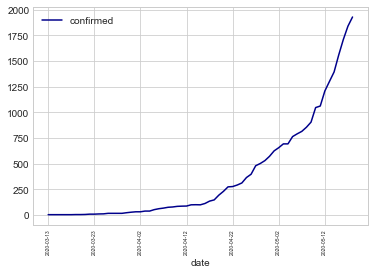

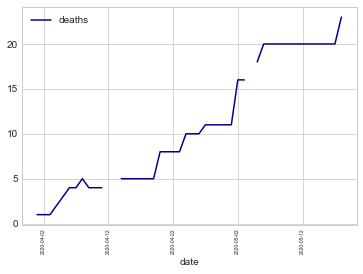

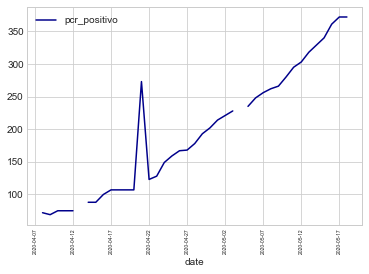

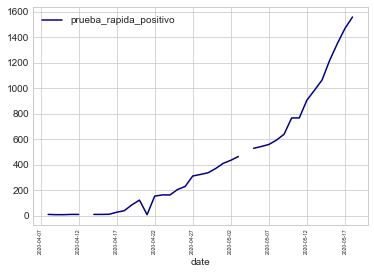

In [11]:
aqp_d.plot.line(x='date',y='confirmed', c='DarkBlue')
plt.xticks(fontsize = 5, rotation=90)
aqp_d.plot.line(x='date',y='deaths', c='DarkBlue')
plt.xticks(fontsize = 5, rotation=90)
aqp_d.plot.line(x='date',y='pcr_positivo', c='DarkBlue')
plt.xticks(fontsize = 5, rotation=90)
aqp_d.plot.line(x='date',y='prueba_rapida_positivo', c='DarkBlue')
plt.xticks(fontsize = 5, rotation=90)
#save_fig("attribute_histogram_plots")
plt.show()

In [12]:
aqp_d.drop(labels = ['recovered','negative_cases','pcr_prapida_positivo'], axis = 1)
aqp_d.reset_index()


,index,country,iso3c,region,date,confirmed,deaths,recovered,negative_cases,pcr_positivo,prueba_rapida_positivo,pcr_prapida_positivo
0,6,Peru,PER,Arequipa,2020-03-13,2,NaN,NaN,NaN,NaN,NaN,NaN
1,12,Peru,PER,Arequipa,2020-03-14,2,NaN,NaN,NaN,NaN,NaN,NaN
2,19,Peru,PER,Arequipa,2020-03-15,2,NaN,NaN,NaN,NaN,NaN,NaN
3,30,Peru,PER,Arequipa,2020-03-16,2,NaN,NaN,NaN,NaN,NaN,NaN
4,41,Peru,PER,Arequipa,2020-03-17,2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
62,1374,Peru,PER,Arequipa,2020-05-14,1393,20.0,NaN,NaN,329.0,1064.0,NaN
63,1400,Peru,PER,Arequipa,2020-05-15,1558,20.0,NaN,NaN,340.0,1218.0,NaN
64,1426,Peru,PER,Arequipa,2020-05-16,1709,20.0,NaN,NaN,361.0,1348.0,NaN
65,1452,Peru,PER,Arequipa,2020-05-17,1839,20.0,NaN,NaN,372.0,1467.0,NaN


In [13]:
dates = peru_d.loc[:,['date']]
confirmed = peru_d.loc[:,['confirmed']]
deaths = peru_d.loc[:,['deaths']]
recoveries = peru_d.loc[:,['recovered']]

In [14]:
confirmed_sum = confirmed.iloc[-1]
death_sum = deaths.iloc[-1]
recovered_sum = recoveries.iloc[-1]

In [15]:
peru_cases = confirmed.to_numpy()
peru_death = deaths.to_numpy()
peru_recovered = recoveries.to_numpy()
peru_active = peru_cases - peru_death - peru_recovered
mortality_rate = peru_death / peru_cases
recovery_rate = peru_recovered/ peru_cases

In [16]:
def incremento_diario(data):
    d = []
    d.append(data[0])
    for i in range(1,len(data)):
            d.append(data[i]-data[i-1])
    return d  

In [17]:
peru_daily_increase = incremento_diario(peru_cases)
peru_daily_death = incremento_diario(peru_death)
peru_daily_recovered = incremento_diario(peru_recovered)

In [18]:
days_since_6_3 = np.array([range(len(dates))]).reshape(-1,1)

In [19]:
days_in_future = 10
future_forcast = np.array([range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forcast[:-10]

In [20]:
start = '6/03/2020'
start_date = datetime.datetime.strptime(start, '%d/%m/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [21]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_6_3, peru_cases, test_size=0.42, shuffle=False)

#preparacion de datos nan
peru_death = np.nan_to_num(peru_death,0)
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(days_since_6_3, peru_death, test_size=0.42, shuffle=False)

In [22]:
# svm_confirmed = svm_search.best_estimator_
# svm para casos confirmados
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1.5,degree=4, C=.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

# svm para muertes
svm_death = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1.5,degree=4, C=.1)
svm_death.fit(X_train_death, y_train_death)
svm_pred_death = svm_death.predict(future_forcast)


C:\Users\ale__\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ale__\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 5780.300160475389
MSE: 83177956.42753936


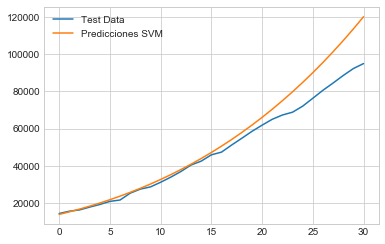

In [23]:
# Calculo del Error para prediccion casos
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
svm_test_pred_death = svm_death.predict(X_test_death) 

plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'Predicciones SVM'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

MAE: 73.96509706975712
MSE: 11532.279033852521


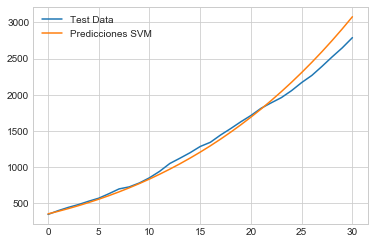

In [24]:
# Calculo del error para prediccion muertes
svm_test_pred_death = svm_death.predict(X_test_death) 

plt.plot(y_test_death)
plt.plot(svm_test_pred_death)
plt.legend(['Test Data', 'Predicciones SVM'])
print('MAE:', mean_absolute_error(svm_test_pred_death, y_test_death))
print('MSE:',mean_squared_error(svm_test_pred_death, y_test_death))

In [25]:
# Transformacion de data para regresion polinomial
poly = PolynomialFeatures(degree=3)
#Prediccion de casos
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)

#Prediccion de muertes
poly_X_train_death = poly.fit_transform(X_train_death)
poly_X_test_death = poly.fit_transform(X_test_death)

#
poly_future_forcast = poly.fit_transform(future_forcast)

In [26]:
# regresion polinomial para casos
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 11506.55018955693
MSE: 211205619.35477653


In [27]:
print(linear_model.coef_)

[[-446.37430786  235.39297186  -21.91547288    0.60322971]]


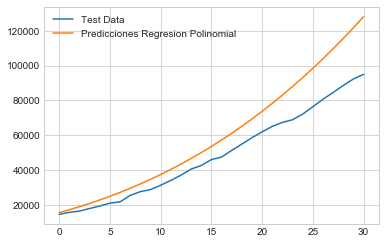

In [28]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Predicciones Regresion Polinomial'])

In [29]:
# regresion polinomial para muertes
linear_model_death = LinearRegression(normalize=True, fit_intercept=False)
linear_model_death.fit(poly_X_train_death, y_train_death)
test_linear_pred_death = linear_model_death.predict(poly_X_test_death)
linear_pred_death = linear_model_death.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred_death, y_test_death))
print('MSE:',mean_squared_error(test_linear_pred_death, y_test_death))

MAE: 317.5653396487943
MSE: 143359.3819812331


In [30]:
print(linear_model_death.coef_)

[[ 1.19641599  0.20224532 -0.11687948  0.00714913]]


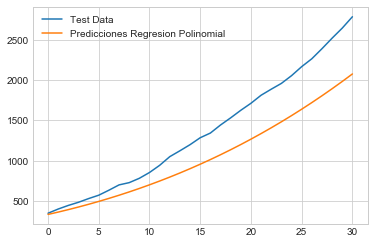

In [31]:
plt.plot(y_test_death)
plt.plot(test_linear_pred_death)
plt.legend(['Test Data', 'Predicciones Regresion Polinomial'])

In [32]:
dates_n = dates.to_numpy()
dates_n = dates_n.reshape(1,-1)[0]
#adjusted_dates

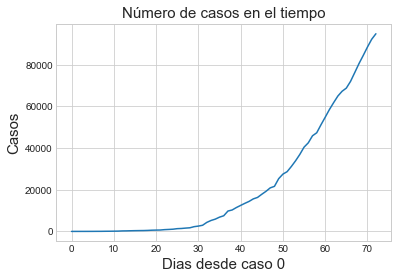

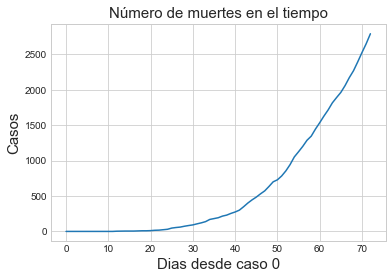

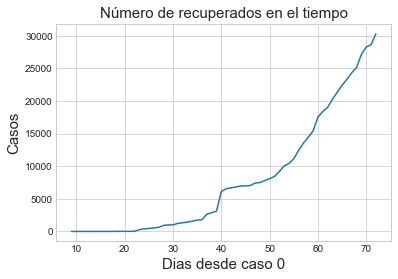

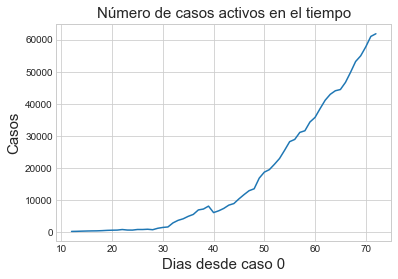

In [33]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
#future_forcast = future_forcast_dates.reshape(1, -1)[0]
#plt.figure(figsize=(8, 4.5))
#plt.plot(dates_n, peru_cases)
plt.plot(adjusted_dates, peru_cases)
plt.title('Número de casos en el tiempo', size=15)
plt.xlabel('Dias desde caso 0', size=15)
plt.ylabel('Casos', size=15)

plt.xticks(size=10)
plt.yticks(size=10)
#plt.locator_params(axis = 'x', nbins=1)
plt.show()

#plt.figure(figsize=(8, 4.5))
plt.plot(adjusted_dates, peru_death)
plt.title('Número de muertes en el tiempo', size=15)
plt.xlabel('Dias desde caso 0', size=15)
plt.ylabel('Casos', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

#plt.figure(figsize=(8, 4.5))
plt.plot(adjusted_dates, peru_recovered)
plt.title('Número de recuperados en el tiempo', size=15)
plt.xlabel('Dias desde caso 0', size=15)
plt.ylabel('Casos', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

#plt.figure(figsize=(8, 4.5))
plt.plot(adjusted_dates, peru_active)
plt.title('Número de casos activos en el tiempo', size=15)
plt.xlabel('Dias desde caso 0', size=15)
plt.ylabel('Casos', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [34]:
def plot_predictions(x, y, pred, algo_name, color, title):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Número de ' + title + ' en el tiempo', size=25)
    plt.xlabel('Días desde caso 0', size=25)
    plt.ylabel(title, size=25)
    plt.legend([ title +' confirmados', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

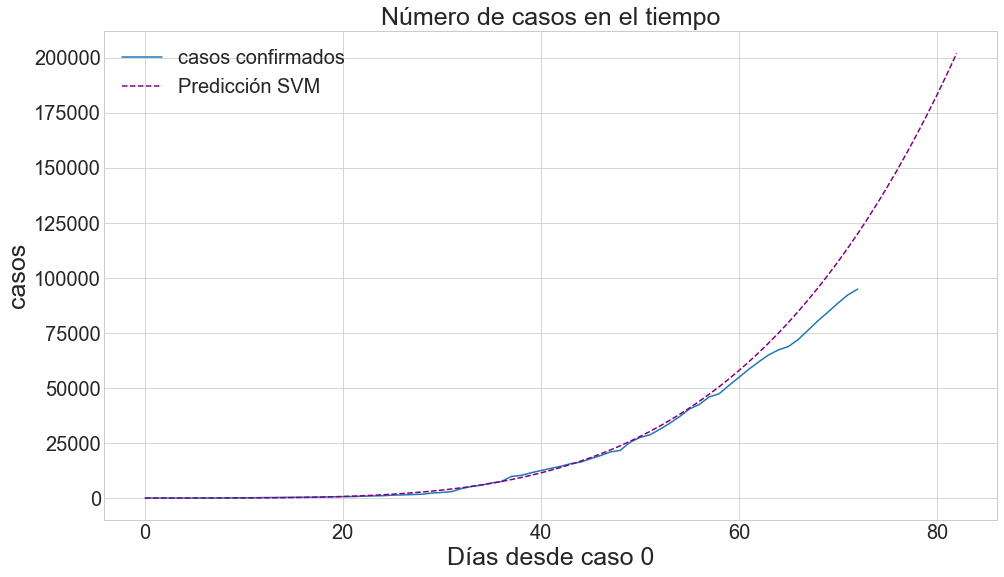

In [35]:
plot_predictions(adjusted_dates, peru_cases, svm_pred, 'Predicción SVM', 'purple', 'casos')

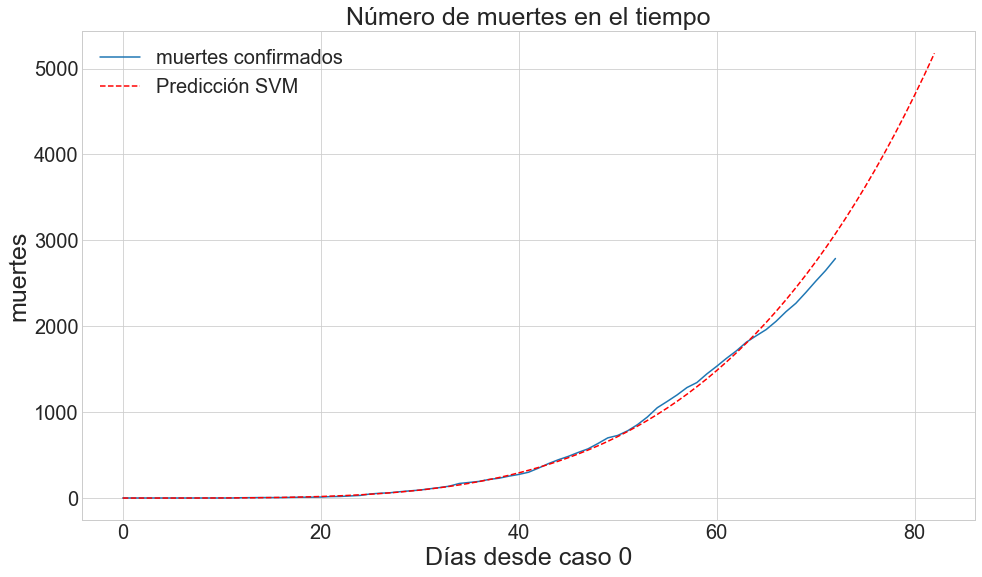

In [36]:
plot_predictions(adjusted_dates, peru_death, svm_pred_death, 'Predicción SVM', 'red', 'muertes')

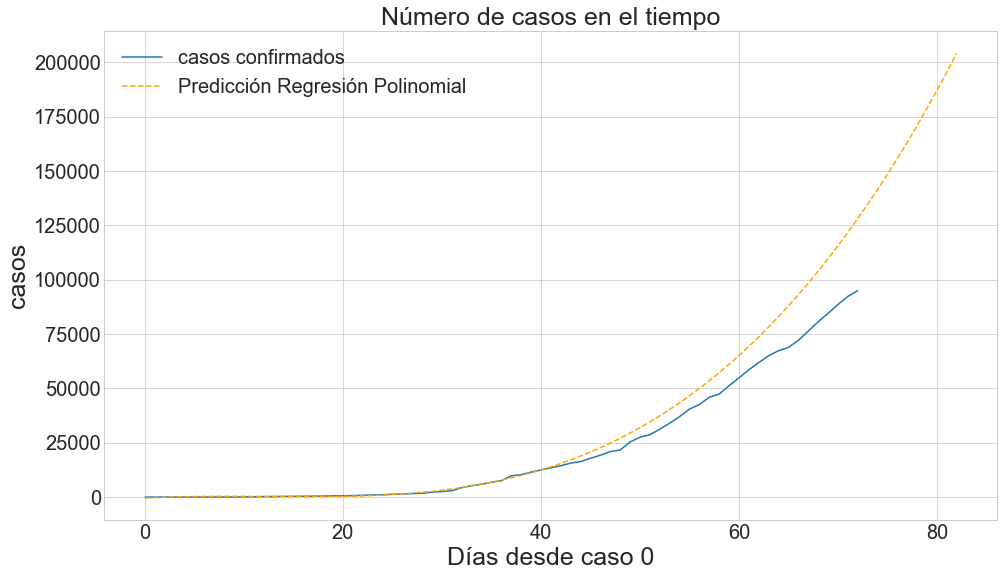

In [37]:
plot_predictions(adjusted_dates, peru_cases, linear_pred, 'Predicción Regresión Polinomial', 'orange', 'casos')

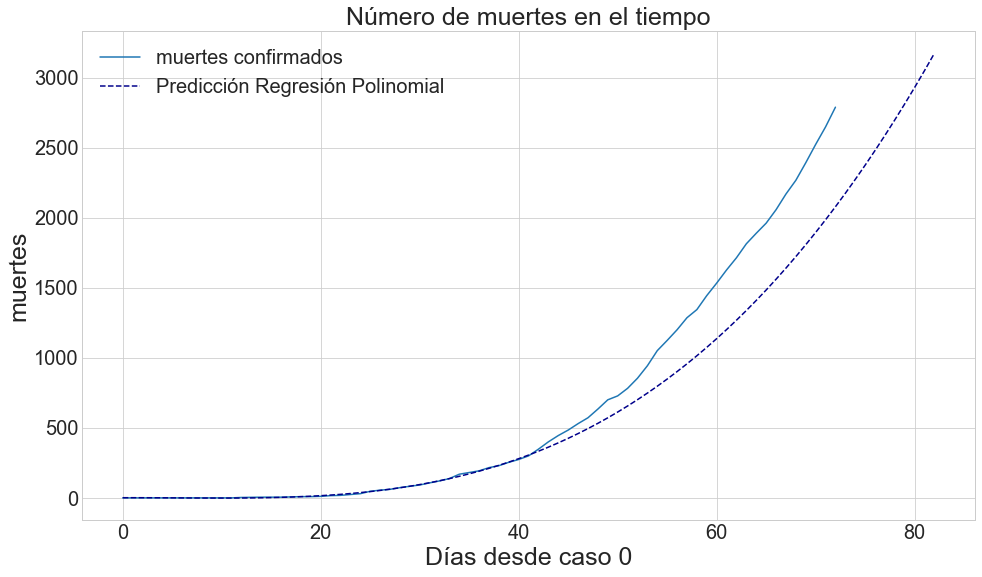

In [38]:
plot_predictions(adjusted_dates, peru_death, linear_pred_death, 'Predicción Regresión Polinomial', 'darkblue', 'muertes')

In [39]:
# Predicciones futuras usando SVM
svm_df = pd.DataFrame({'Fecha': future_forcast_dates[-10:], 'Casos': np.round(svm_pred[-10:]),'Muertes':np.round(svm_pred_death[-10:])})
svm_df

,Fecha,Casos,Muertes
0,05/18/2020,126905.0,3252.0
1,05/19/2020,134002.0,3434.0
2,05/20/2020,141393.0,3624.0
3,05/21/2020,149085.0,3821.0
4,05/22/2020,157088.0,4026.0
5,05/23/2020,165408.0,4239.0
6,05/24/2020,174054.0,4461.0
7,05/25/2020,183035.0,4691.0
8,05/26/2020,192359.0,4930.0
9,05/27/2020,202035.0,5178.0


In [40]:
# Predicciones futuras usando Regresion Polinomial
linear_pred = linear_pred.reshape(1,-1)[0]
linear_pred_death = linear_pred_death.reshape(1,-1)[0]
svm_df = pd.DataFrame({'Fecha': future_forcast_dates[-10:], 'Casos': np.round(linear_pred[-10:]),'Muertes':np.round(linear_pred_death[-10:])})
svm_df

,Fecha,Casos,Muertes
0,05/18/2020,134616.0,2174.0
1,05/19/2020,141407.0,2273.0
2,05/20/2020,148421.0,2375.0
3,05/21/2020,155663.0,2480.0
4,05/22/2020,163136.0,2588.0
5,05/23/2020,170844.0,2699.0
6,05/24/2020,178791.0,2813.0
7,05/25/2020,186980.0,2930.0
8,05/26/2020,195414.0,3050.0
9,05/27/2020,204098.0,3174.0


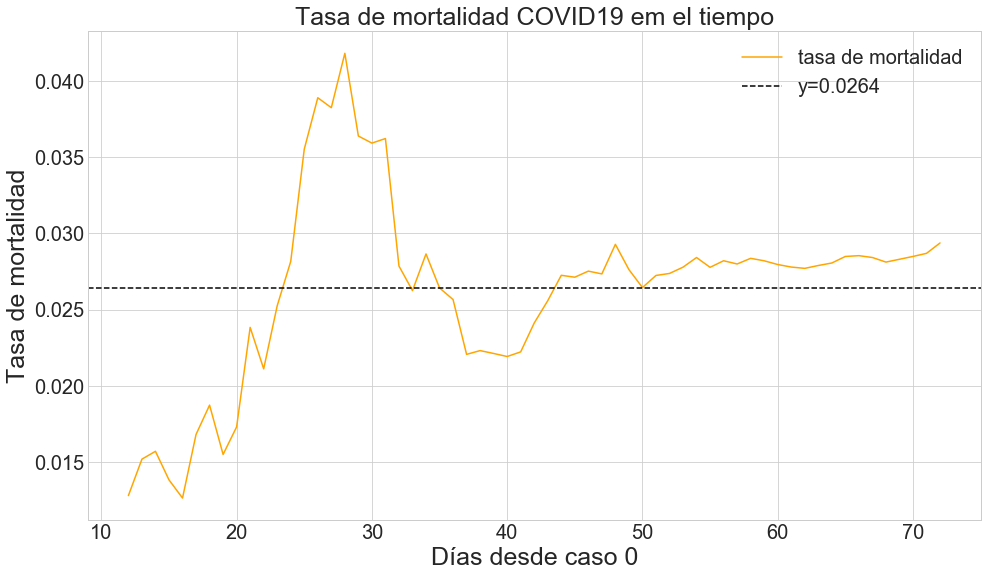

In [41]:
mean_mortality_rate = np.round(np.nanmean(mortality_rate),4)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Tasa de mortalidad COVID19 em el tiempo', size=25)
plt.legend(['tasa de mortalidad', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Días desde caso 0', size=25)
plt.ylabel('Tasa de mortalidad', size=25)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

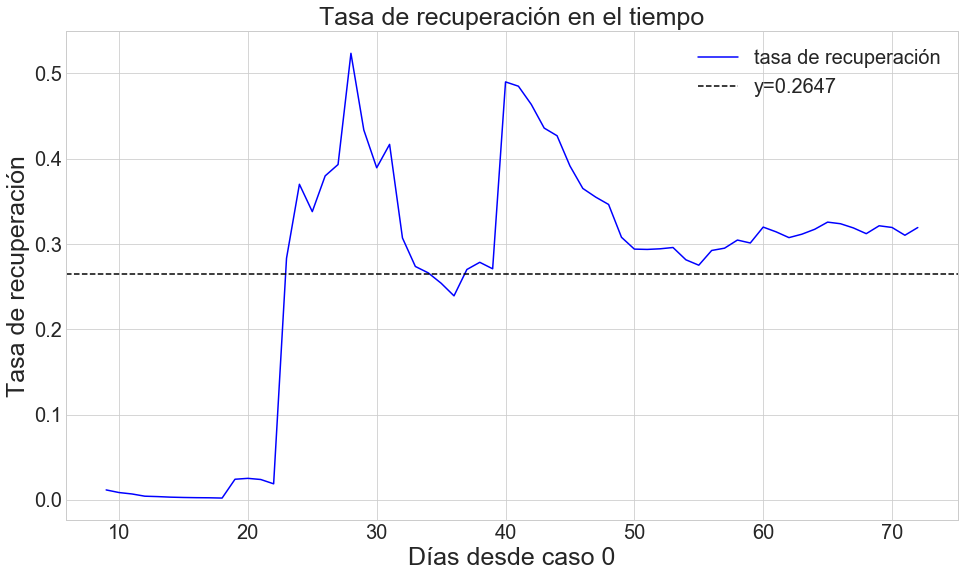

In [42]:
mean_recovery_rate = np.round(np.nanmean(recovery_rate),4)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Tasa de recuperación en el tiempo', size=25)
plt.legend(['tasa de recuperación', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Días desde caso 0', size=25)
plt.ylabel('Tasa de recuperación', size=25)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [43]:
#Regresion Lineal elaborada


In [44]:
def Normalizar_Datos(data : np.array):
    normal = np.empty_like(data)
    for i in range (0,np.size(data[0])):
        media = np.mean(data[:,i])
        desvi =np.std(data[:,i])
        normal[:,i] = (data[:,i] - media)/desvi
    return normal, media, desvi

In [45]:
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(days_since_6_3, peru_death, test_size=0.1, shuffle=False)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_6_3, peru_cases, test_size=0.1, shuffle=False)

In [46]:
X_train_death_n = X_train_death.astype('float64')
y_train_death_n = y_train_death.astype('float64')

X_train_death_n, med_X_train_death, des_X_train_death = Normalizar_Datos(X_train_death_n)
y_train_death_n, med_y_train_death, des_y_train_death = Normalizar_Datos(y_train_death_n)

In [47]:
def Ecuacion_Normal(X :np.array , y:np.array):
    XT = np.transpose(X)
    return np.dot(np.dot( np.linalg.inv( np.dot(XT, X)) , XT) , y)

In [48]:
def Calcular_Costo(X: np.array, y: np.array, theta: np.array):
    #J(theta) = 1/2m SUM(h(x) - y)^2
    m = np.size(X[:,0]) #numero de datos
    #Calculo de h(x)
    h = X.dot(theta.T)
    h = h - y
    return np.sum( np.square(h) ) / (2*m) , h

In [49]:
def Gradiente_Descendiente(X: np.array, y:np.array, theta:np.array,
                          num_itera:int, tasa_apren:float):
    m = np.size(X[:,0]) #numero de datos
    arr_costo = np.zeros(num_itera, dtype=float)   
    #Calculo con valor inicial
    arr_costo[0], h = Calcular_Costo(X, y, theta)
    #Iteraciones
    for itera in range(1,num_itera):
        theta = theta - ( tasa_apren * (np.dot(h, X)/m))      
        arr_costo[itera], h = Calcular_Costo(X, y, theta)
    return arr_costo, theta

In [50]:
def InicializarXo(X: np.array):
    #Funcion para Insertar Columna X0 = 1 
    one = np.ones( (len(X)) )
    return np.c_[ (one, X)]

In [51]:
def Error_Cuadratico_Medio(x_test: np.array, y_test: np.array, theta:np.array):
    n = np.size(y_test)
    #y_calc = np.empty(n)
    y_calc = x_test.dot(theta)
    #print(x_test)
    return (np.sum(np.square(y_calc-y_test)))/n

In [52]:
#Valores Theta para Gradiente Descendiente
def CalculoTheta(X:np.array, y:np.array):
    y_train = []
    X_train = InicializarXo(X)
    for i in y:
        y_train.append(i[0])
 
    theta = np.zeros( (np.size(X_train[0])))
    dummy, theta = (Gradiente_Descendiente(X_train, y_train, theta,200, 0.2))
    
    theta_ec = Ecuacion_Normal(X_train, y_train)

    error = Error_Cuadratico_Medio(X_train, y_train, theta)
    return theta, theta_ec, error

In [53]:
theta_calc, theta_ec, error = CalculoTheta(X_train_death_n, y_train_death_n)
#Valores theta por la gradiente descendiente
theta_calc

array([-5.60235619e-17,  8.65667005e-01])

In [54]:
#Valores theta por la Ec. Normal
theta_ec, error

(array([-4.85722573e-17,  8.65667005e-01]), 0.25062063572048043)

In [55]:
#Preparacion de data para prediccion
future_forcast_n = future_forcast.astype('float64')
future_forcast_n = (future_forcast_n - med_X_train_death)/des_X_train_death
future_forcast_n = InicializarXo(future_forcast_n)
y_pred_death = future_forcast_n.dot(theta_calc)
y_pred_death = (y_pred_death * des_y_train_death)+med_y_train_death

In [56]:
#Presentacion de Resultados
y_pred_death_df = pd.DataFrame({'Fecha': future_forcast_dates[-10:], 'Muertes':np.round(y_pred_death[-10:])})
y_pred_death_df

,Fecha,Muertes
0,05/18/2020,1428.0
1,05/19/2020,1453.0
2,05/20/2020,1478.0
3,05/21/2020,1503.0
4,05/22/2020,1528.0
5,05/23/2020,1553.0
6,05/24/2020,1578.0
7,05/25/2020,1603.0
8,05/26/2020,1628.0
9,05/27/2020,1653.0


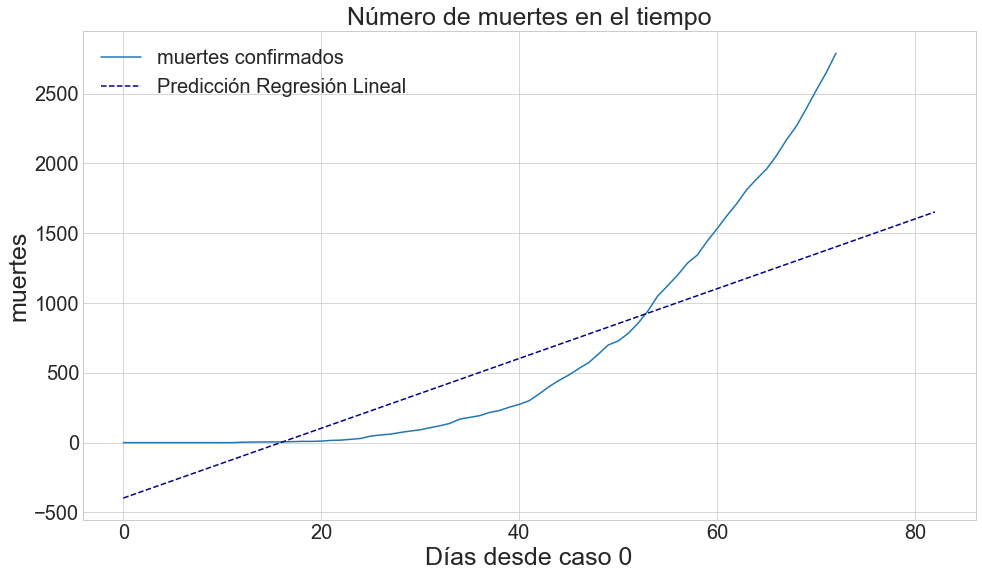

In [57]:
plot_predictions(adjusted_dates, peru_death, y_pred_death, 'Predicción Regresión Lineal', 'darkblue', 'muertes')

In [58]:
#Toma de data para Regresion lineal multiple
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(days_since_6_3, peru_death, test_size=0.1, shuffle=False)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_6_3, peru_cases, test_size=0.1, shuffle=False)


In [59]:
#Preparacion de data para Regresion lineal multiple
X_train_confirmed = X_train_confirmed.astype('float64')
y_train_confirmed = y_train_confirmed.astype('float64')

X_train_confirmed_n, mid_X_train, svi_X_train = Normalizar_Datos(X_train_confirmed)
y_train_confirmed_n, mid_y_train, svi_y_train = Normalizar_Datos(y_train_confirmed)

X_train_fecha_conf = np.c_[ (X_train_confirmed_n, y_train_confirmed_n)]
#X_train_fecha_conf

In [60]:
theta_n , theta_ec_n, error_n = CalculoTheta(X_train_fecha_conf, y_train_death_n)
#Valores theta por la gradiente descendiente
theta_n, error_n

(array([-1.07093821e-16, -2.20813919e-02,  1.01802527e+00]),
 0.0015494921364909127)

In [61]:
#Utilizamos la data de la prediccion de SVM para completar data para prediccion
#Normalizamos
svm_pred_n = (svm_pred - mid_y_train)/svi_y_train
#svm_pred_n

In [62]:
#Preparamos X para calculo de y prediccion
x_future_calc_n = np.c_[(future_forcast_n, svm_pred_n)]
#x_future_calc_n

In [63]:
#Prediccion 
y_future_calc_n = x_future_calc_n.dot(theta_n)
#y_future_calc_n

In [64]:
#Desnormalizacion y Presentacion de Resultados
y_future_calc_n = (y_future_calc_n * des_y_train_death)+med_y_train_death

y_multi_death_df = pd.DataFrame({'Fecha': future_forcast_dates[-10:], 'Muertes':np.round(y_future_calc_n[-10:])})
y_multi_death_df

,Fecha,Muertes
0,05/18/2020,3574.0
1,05/19/2020,3776.0
2,05/20/2020,3986.0
3,05/21/2020,4204.0
4,05/22/2020,4432.0
5,05/23/2020,4668.0
6,05/24/2020,4914.0
7,05/25/2020,5169.0
8,05/26/2020,5434.0
9,05/27/2020,5709.0


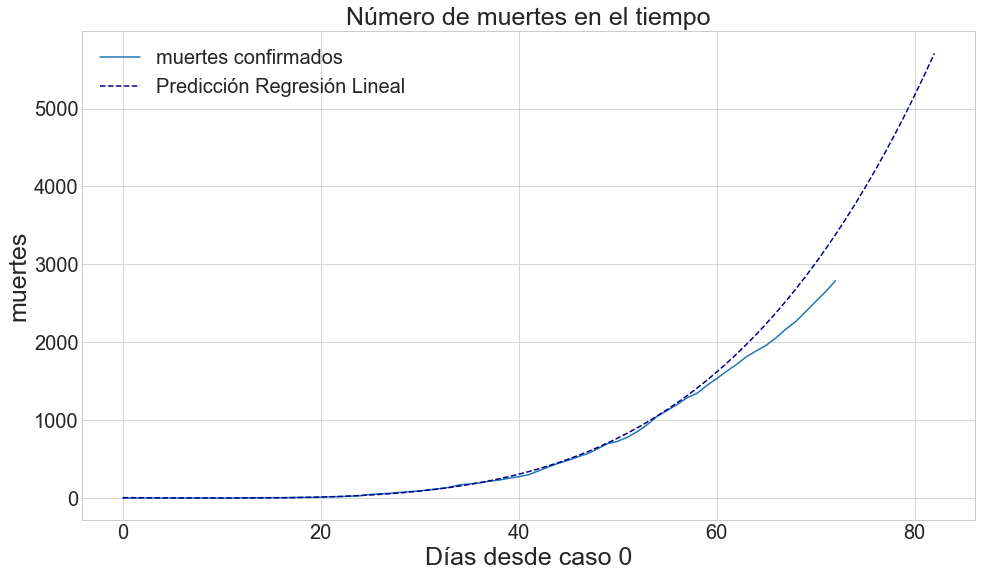

In [65]:
plot_predictions(adjusted_dates, peru_death, y_future_calc_n, 'Predicción Regresión Lineal', 'darkblue', 'muertes')

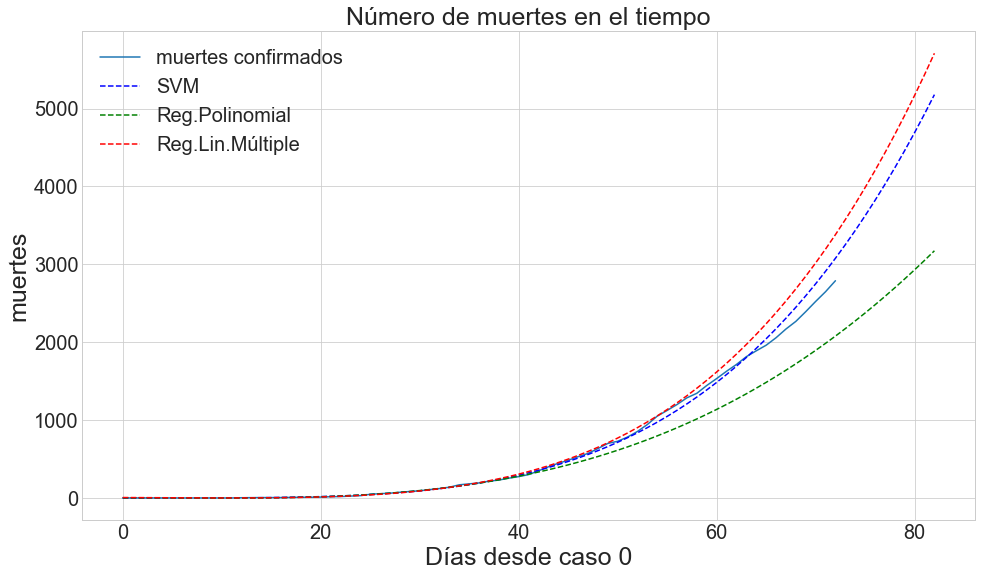

In [77]:
#def plot_predictions(x, y, pred, algo_name, color, title):
x = adjusted_dates
y = peru_death
algo_name1 = 'SVM'
algo_name2 = 'Reg.Polinomial'
algo_name3 = 'Reg.Lin.Múltiple'
title = 'muertes'
plt.figure(figsize=(16, 9))
plt.plot(x, y)
plt.plot(future_forcast, svm_pred_death, linestyle='dashed', color='blue')
plt.plot(future_forcast, linear_pred_death, linestyle='dashed', color='green')
plt.plot(future_forcast, y_future_calc_n, linestyle='dashed', color='red')

#y_future_calc_n

plt.title('Número de ' + title + ' en el tiempo', size=25)
plt.xlabel('Días desde caso 0', size=25)
plt.ylabel(title, size=25)

plt.legend([title +' confirmados', algo_name1, algo_name2, algo_name3], prop={'size': 20})
#plt.legend([ title +' confirmados', algo_name2], prop={'size': 20})

plt.xticks(size=20)
plt.yticks(size=20)
plt.show()